In [12]:
# -------------------------------------------------------
# Machine Learning Classification with PCA + Model Comparison
# -------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
# -------------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------------
df = pd.read_csv("./data/normalized_features.csv")
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (3843, 1421)
   VelAvg_J2_X  VelMax_J2_X  VelMin_J2_X  Top1VelDiff_J2_X  Top2VelDiff_J2_X  \
0     1.006352     0.999872     0.999872                 0                 0   
1     0.999112     0.999872     0.999872                 0                 0   
2     0.999112     0.999872     0.999872                 0                 0   
3     0.999112     0.999872     0.999872                 0                 0   
4     1.013592     0.999872     0.999872                 0                 0   

   Top3VelDiff_J2_X  AccAvg_J2_X  AccMax_J2_X  AccMin_J2_X  Top1AccDiff_J2_X  \
0                 0     1.000235      0.99987      0.99987                 0   
1                 0     1.000235      0.99987      0.99987                 0   
2                 0     0.988184      0.99987      0.99987                 0   
3                 0     0.988184      0.99987      0.99987                 0   
4                 0     1.000235      0.99987      0.99987                 0   

   ...  Eu

In [14]:
# -------------------------------------------------------
# 2. Separate Features & Target
# -------------------------------------------------------
target_column = "Label"     # <-- Change if needed

X = df.drop(columns=[target_column])
y = df[target_column]

In [15]:
# -------------------------------------------------------
# 3. Train-Test Split
# -------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Train Shape: (3074, 1420) Test Shape: (769, 1420)


In [16]:
# -------------------------------------------------------
# 4. Standard Scaling
# -------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# -------------------------------------------------------
# 5. PCA (retain 95% variance)
# -------------------------------------------------------
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original features:", X.shape[1])
print("Reduced features after PCA:", X_train_pca.shape[1])

Original features: 1420
Reduced features after PCA: 165


In [18]:
# -------------------------------------------------------
# 6. Define Models
# -------------------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM (RBF)": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=200)
}

In [19]:
# -------------------------------------------------------
# 7. Train & Evaluate Models
# -------------------------------------------------------
results = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("\n==============================")
    print(f"MODEL: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))


MODEL: Logistic Regression
Accuracy: 0.9869960988296489
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           3       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         3
           8       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00        36
          16       0.83      0.71      0.77        14
          17       1.00      1.00      1.00        25
          18       0.00      0.00      0.00         2
          19       0.75      0.75      0.75         4
          35       0.91      0.91      0.91        11
          36       0.96      1.00      0.98        25
          38       1.00      1.00      1.00        12


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


MODEL: Random Forest
Accuracy: 0.9245773732119635
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.67      0.71        15
           3       1.00      0.86      0.92         7
           5       0.00      0.00      0.00         2
           6       1.00      0.83      0.91         6
           7       0.00      0.00      0.00         3
           8       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       0.78      0.97      0.86        36
          16       1.00      0.64      0.78        14
          17       0.85      0.92      0.88        25
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         4
          35       1.00      0.82      0.90        11
          36       0.93      1.00      0.96        25
          38       0.92      0.92      0.92        12
      

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

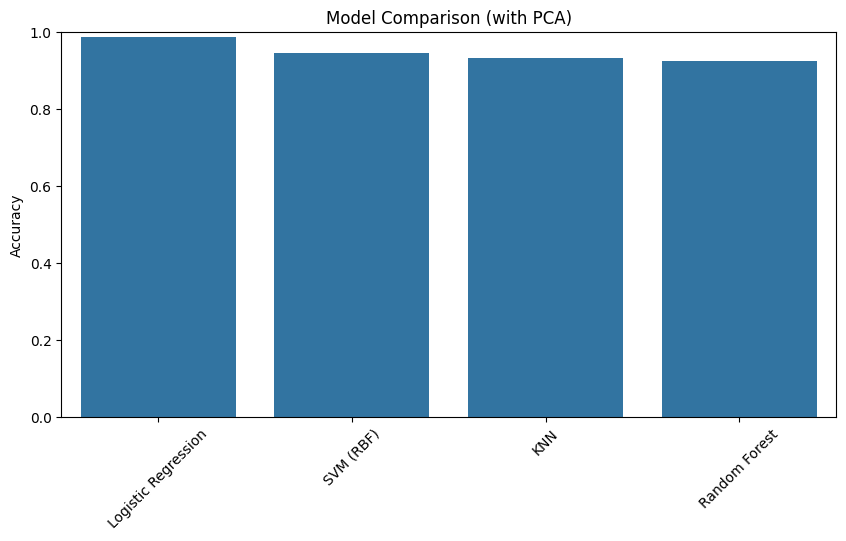

In [21]:
# -------------------------------------------------------
# 8. Compare Accuracies (Bar Plot)
# -------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Comparison (with PCA)")
plt.ylim(0, 1)
plt.show()

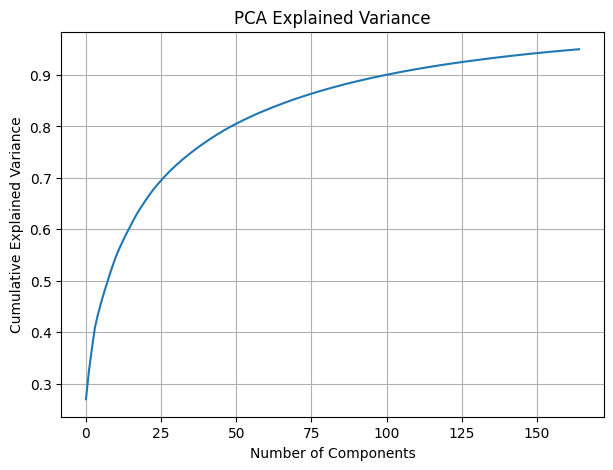

In [22]:
# -------------------------------------------------------
# 9. PCA Explained Variance Plot
# -------------------------------------------------------
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()
